In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 读取数据
data = pd.read_csv("SEER原始数据.csv")

# === 1. 数据概览 ===
print("="*40)
print("数据概览：")
print(f"总行数：{len(data)}")
print(f"初始列名：{data.columns.tolist()}\n")


数据概览：
总行数：7929839
初始列名：['Sex', 'Race recode (White, Black, Other)', 'Age recode with <1 year olds', 'Year of diagnosis', 'Primary Site - labeled', 'Site recode ICD-O-3/WHO 2008', 'Histologic Type ICD-O-3', 'Grade Recode (thru 2017)', 'Derived AJCC Stage Group, 7th ed (2010-2015)', 'CS tumor size (2004-2015)', 'CS mets at dx (2004-2015)', 'RX Summ--Surg Prim Site (1998+)', 'Survival months']



In [2]:
# === 2. 列名修正 ===
possible_names = ['Survival months', 'Survival_Months', 'survival_months', 'months']
target_col = 'months'

for name in possible_names:
    if name in data.columns:
        if name != target_col:
            data = data.rename(columns={name: target_col})
        break
else:
    raise KeyError("未找到生存月数相关列")

NameError: name 'data' is not defined

In [ ]:
# === 3. 缺失值分析 ===
def analyze_missing(data):
    missing = data.isnull().sum()
    missing_pct = (missing / len(data)) * 100
    missing_df = pd.concat([missing, missing_pct], axis=1)
    missing_df.columns = ['缺失数量', '缺失比例(%)']
    return missing_df[missing_df['缺失数量'] > 0]

print("="*40)
print("缺失值分析报告：")
missing_report = analyze_missing(data)
if not missing_report.empty:
    print(missing_report)

    # 可视化缺失值
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_report.index, y='缺失比例(%)', data=missing_report)
    plt.xticks(rotation=45)
    plt.title("各列缺失值比例")
    plt.tight_layout()
    plt.show()
else:
    print("无缺失值\n")

异常值分析报告：


C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


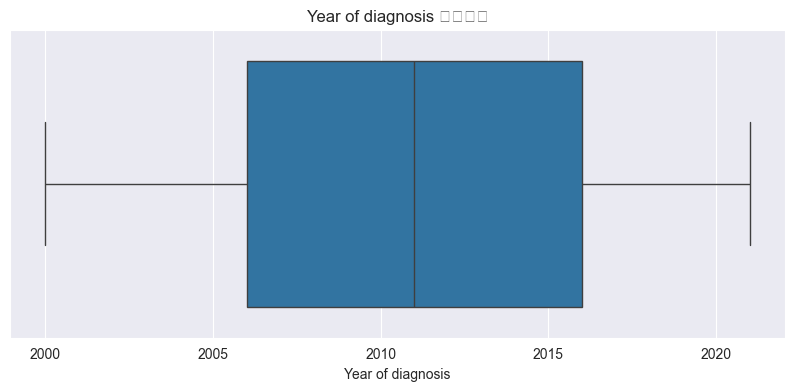

C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


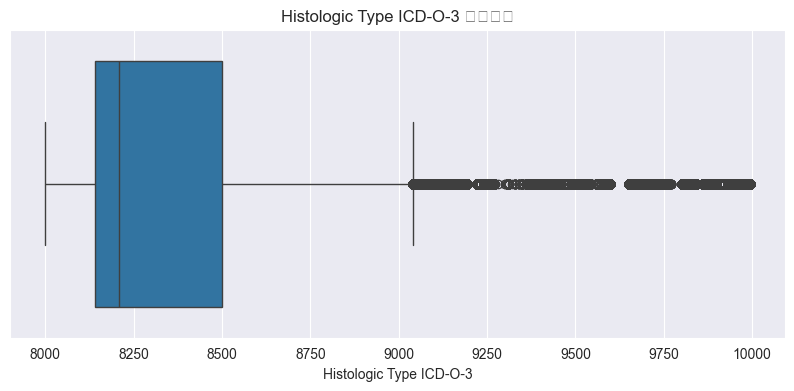

C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\46523\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


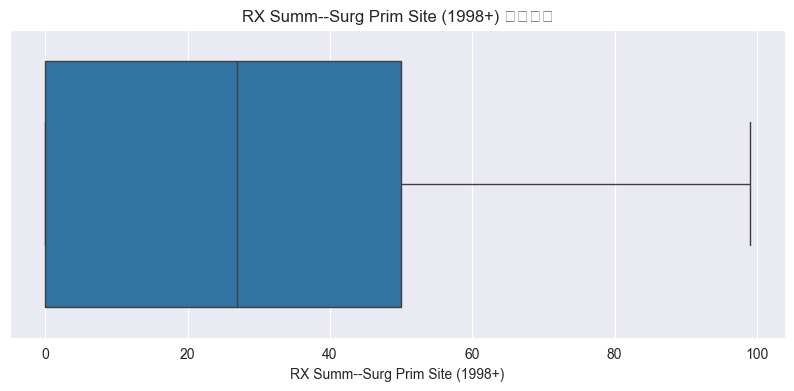

                                                   异常数量  异常比例(%)     最小值  \
Year of diagnosis                                   0.0     0.00  2000.0   
Histologic Type ICD-O-3                       1085387.0    13.69  8000.0   
RX Summ--Surg Prim Site (1998+)                     0.0     0.00     0.0   
Age recode with <1 year olds                        NaN      NaN     NaN   
Primary Site - labeled                              NaN      NaN     NaN   
Site recode ICD-O-3/WHO 2008                        NaN      NaN     NaN   
Grade Recode (thru 2017)                            NaN      NaN     NaN   
Derived AJCC Stage Group, 7th ed (2010-2015)        NaN      NaN     NaN   
CS tumor size (2004-2015)                           NaN      NaN     NaN   
CS mets at dx (2004-2015)                           NaN      NaN     NaN   
months                                              NaN      NaN     NaN   

                                                 最大值      平均值  罕见类别数量  \
Year of diagno

In [6]:
# === 4. 异常值分析 ===
def analyze_anomalies(data):
    report = {}

    # 数值型异常检测
    numeric_cols = data.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        stats = data[col].describe()
        q1 = stats['25%']
        q3 = stats['75%']
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        anomalies = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        anomaly_count = len(anomalies)
        pct = (anomaly_count / len(data)) * 100

        report[col] = {
            '异常数量': anomaly_count,
            '异常比例(%)': round(pct, 2),
            '最小值': stats['min'],
            '最大值': stats['max'],
            '平均值': round(stats['mean'], 2)
        }

        # 可视化数值分布
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data[col])
        plt.title(f"{col} 数值分布")
        plt.show()

    # 分类型异常检测
    categorical_cols = data.select_dtypes(exclude=np.number).columns
    for col in categorical_cols:
        value_counts = data[col].value_counts(normalize=True) * 100
        rare_categories = value_counts[value_counts < 1]  # 出现频率<1%的类别

        if not rare_categories.empty:
            report[col] = {
                '罕见类别数量': len(rare_categories),
                '最大占比(%)': round(value_counts.max(), 2),
                '最小占比(%)': round(value_counts.min(), 2)
            }

    return pd.DataFrame(report).T

print("="*40)
print("异常值分析报告：")
anomaly_report = analyze_anomalies(data)
print(anomaly_report)


In [ ]:
# === 5. 关键字段特殊检查 ===
print("="*40)
print("关键字段专项检查：")

# 检查生存月数
if target_col in data.columns:
    print(f"\n{target_col} 检查：")
    print(f"负值数量：{len(data[data[target_col] < 0])}")
    print(f"超过120个月（10年）的数量：{len(data[data[target_col] > 120])}")

# 检查年龄字段（示例）
if 'Age' in data.columns:
    print("\nAge 检查：")
    print("唯一值分布：")
    print(data['Age'].value_counts().head(10))

# === 后续处理建议 ===
print("\n" + "="*40)
print("处理建议：")
print("1. 对于缺失值，建议根据业务场景选择：")
print("   - 删除缺失行（数据量充足时）")
print("   - 使用中位数/众数填充（数值型数据）")
print("   - 建立单独缺失类别（分类型数据）")
print("2. 对于异常值，建议：")
print("   - 验证数据采集准确性")
print("   - 结合业务背景判断是否合理")
print("   - 谨慎处理极端异常值（不要盲目删除）")


关键字段专项检查：

months 检查：
负值数量：0
超过120个月（10年）的数量：1707286

处理建议：
1. 对于缺失值，建议根据业务场景选择：
   - 删除缺失行（数据量充足时）
   - 使用中位数/众数填充（数值型数据）
   - 建立单独缺失类别（分类型数据）
2. 对于异常值，建议：
   - 验证数据采集准确性
   - 结合业务背景判断是否合理
   - 谨慎处理极端异常值（不要盲目删除）


In [ ]:
##修改改进
# 检查数据类型
print(data[target_col].dtype)

# 如果数据类型是字符串，转换为数值型
if data[target_col].dtype == 'object':
    data[target_col] = pd.to_numeric(data[target_col], errors='coerce')

# 再次检查数据类型
print(data[target_col].dtype)

# 检查生存月数
if target_col in data.columns:
    print(f"\n{target_col} 检查：")
    print(f"负值数量：{len(data[data[target_col] < 0])}")
    print(f"超过120个月（10年）的数量：{len(data[data[target_col] > 120])}")

In [69]:
# === 6. 数据处理 ===
# 处理缺失值（仅处理数值列）
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# 转换分类变量（自动排除已命名的目标列）
categorical_cols = data.select_dtypes(include='object').columns.difference([target_col])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))  # 确保处理字符串类型


In [82]:
# === 7. 计算相关系数矩阵 ===
corr_matrix = data.corr()

ValueError: could not convert string to float: '<18'

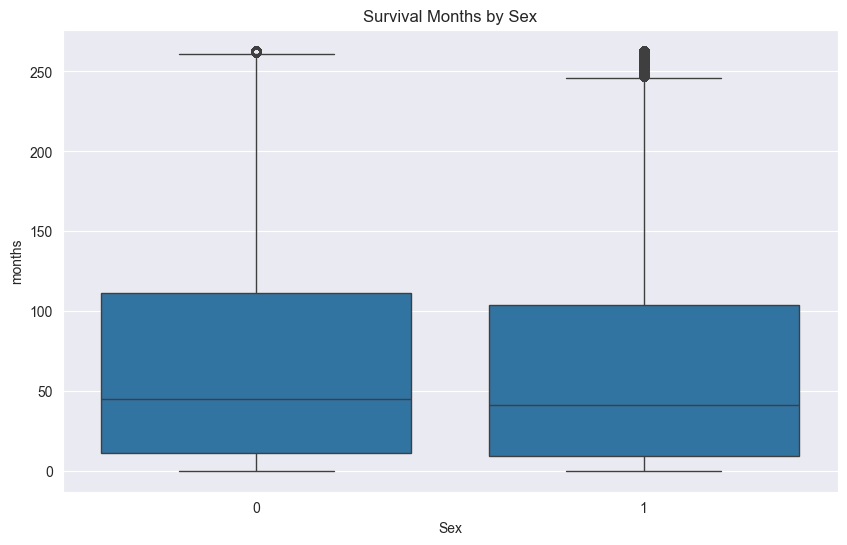

In [ ]:
# === 8. 生成图表 ===

#4.3.2 分组箱线图：按性别查看生存月数分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y=target_col, data=data)
plt.title("Survival Months by Sex")
plt.show()

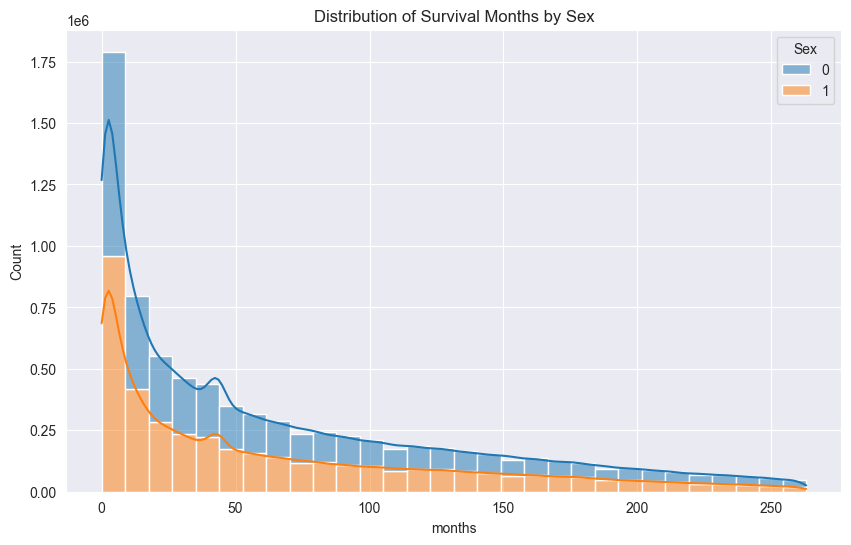

In [ ]:
#4.3.3 分组分布图：按性别查看生存月数的分布
plt.figure(figsize=(10, 6))
sns.histplot(data, x=target_col, hue='Sex', multiple="stack", bins=30, kde=True)
plt.title("Distribution of Survival Months by Sex")
plt.show()

In [ ]:
# 4.3.4散点图矩阵：查看数值特征之间的关系
sns.pairplot(data.select_dtypes(include=[np.number]))
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

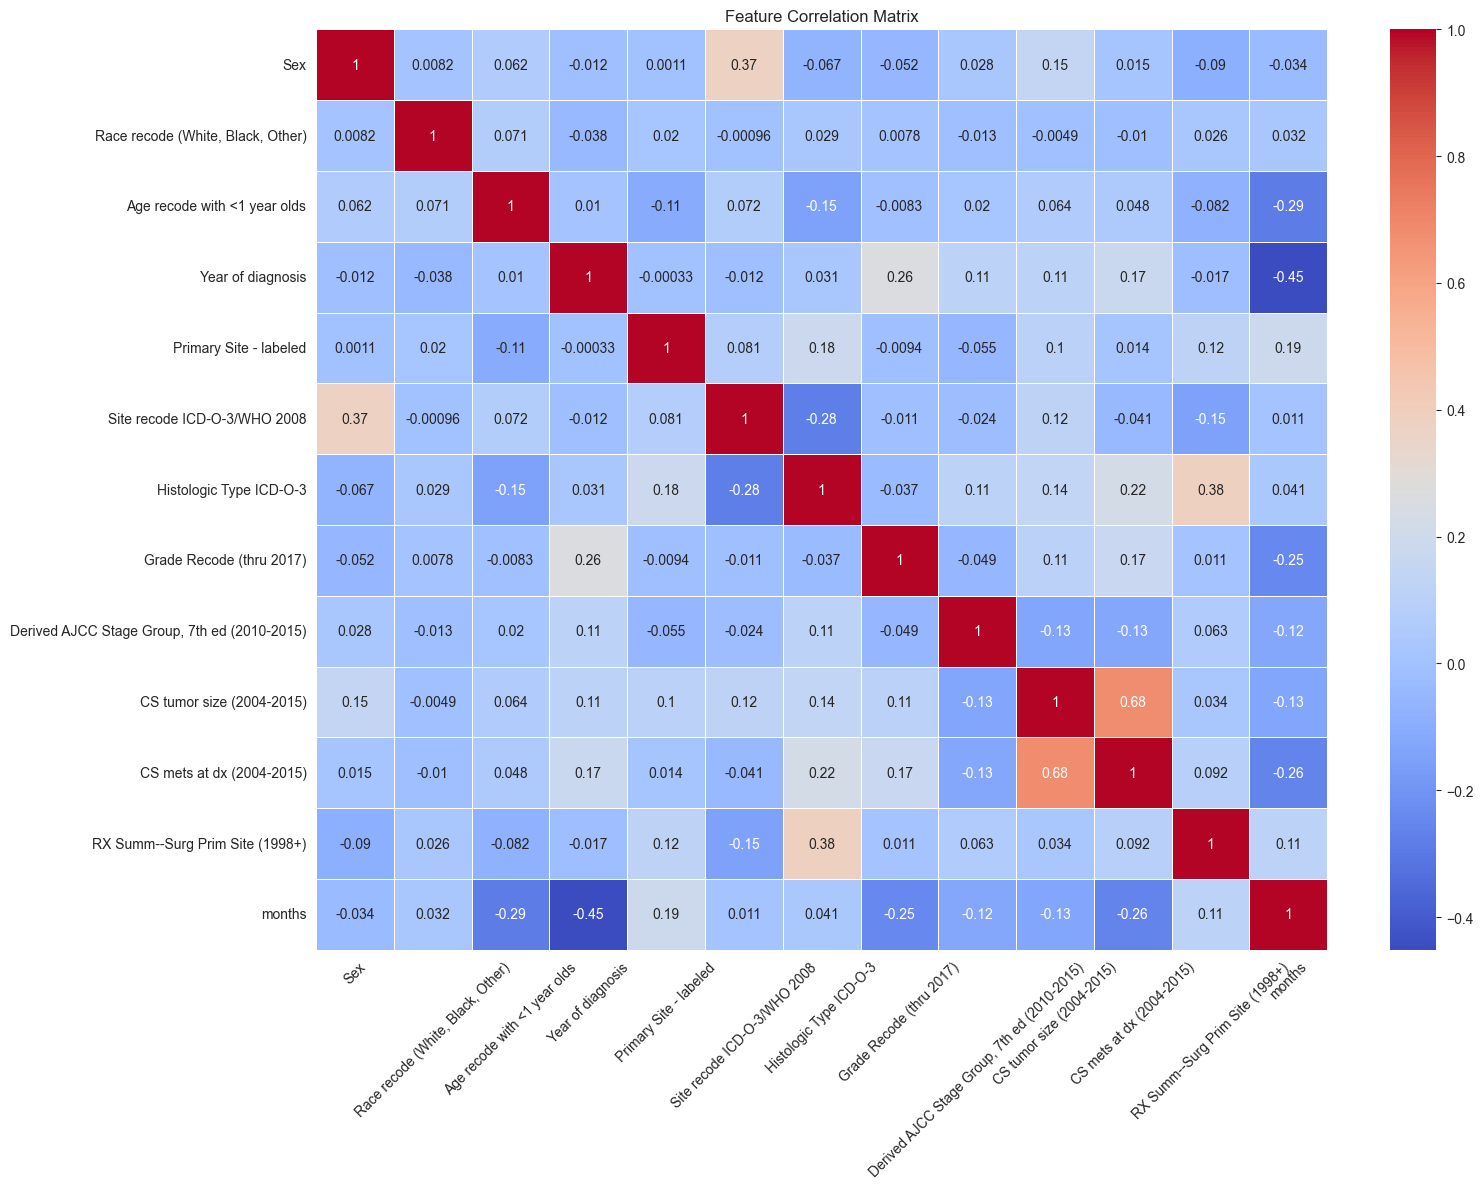

In [ ]:
#4.3.5 热力图：查看特征之间的相关性
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 10})
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

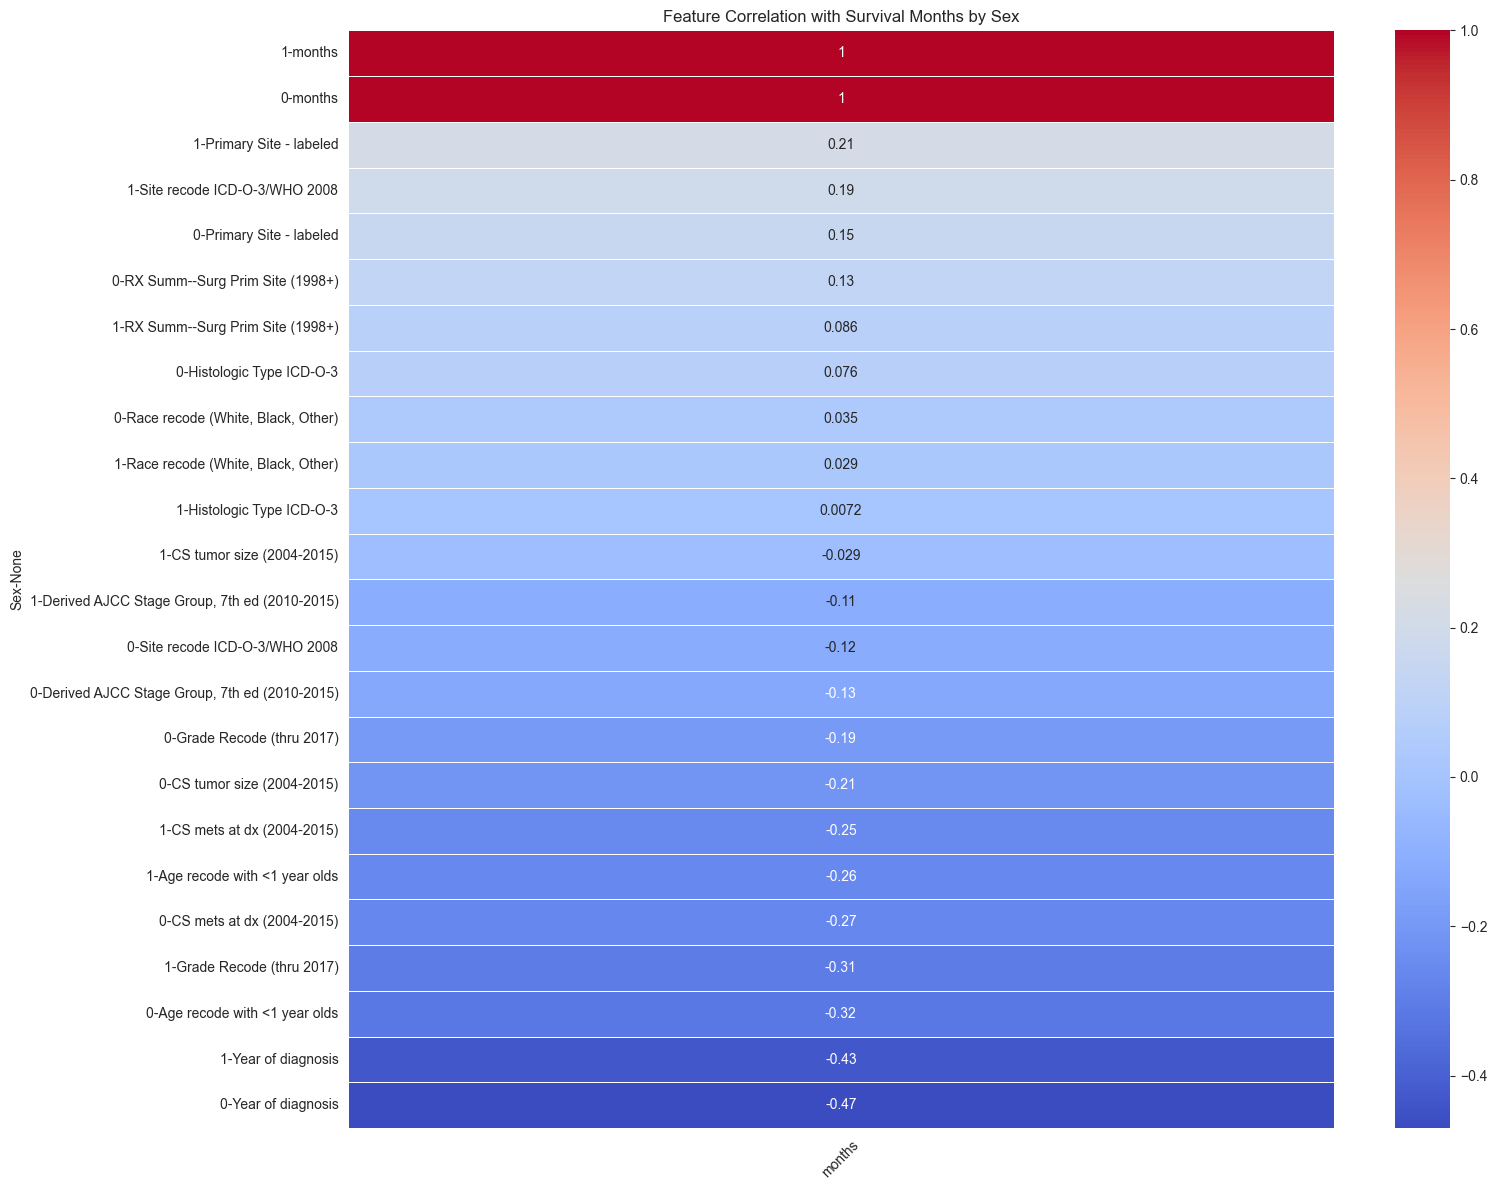

In [ ]:
#4.3.6 分组热力图：查看不同性别的特征与生存月数之间的相关性
plt.figure(figsize=(16, 12))
sns.heatmap(data.groupby('Sex').corr()[[target_col]].sort_values(by=target_col, ascending=False), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 10})
plt.title("Feature Correlation with Survival Months by Sex")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## 数值转换

# 数据已经加载并且 target_col 已经设置为 'months'
# 如果 target_col 不是 'months'，请确保 target_col 设置正确
target_col = 'months'

# 检查数据类型并转换
if data[target_col].dtype == 'object':
    data[target_col] = pd.to_numeric(data[target_col], errors='coerce')

# 确保 'Age recode with <1 year olds' 列存在
age_col = 'Age recode with <1 year olds'
if age_col not in data.columns:
    age_col = 'Age'  # 如果列名不同，请相应修改

# 确保 'Primary Site - labeled' 列存在
primary_site_col = 'Primary Site - labeled'
if primary_site_col not in data.columns:
    primary_site_col = 'Primary Site'  # 如果列名不同，请相应修改

# 确保 'CS tumor size (2004-2015)' 列存在
tumor_size_col = 'CS tumor size (2004-2015)'
if tumor_size_col not in data.columns:
    tumor_size_col = 'Tumor Size'  # 如果列名不同，请相应修改

# 确保 'CS mets at dx (2004-2015)' 列存在
mets_col = 'CS mets at dx (2004-2015)'
if mets_col not in data.columns:
    mets_col = 'Mets at Dx'  # 如果列名不同，请相应修改

# 确保 'Sex' 列存在
sex_col = 'Sex'
if sex_col not in data.columns:
    sex_col = 'Gender'  # 如果列名不同，请相应修改

# 确保 'Histologic Type ICD-O-3' 列存在
histologic_type_col = 'Histologic Type ICD-O-3'
if histologic_type_col not in data.columns:
    histologic_type_col = 'Histologic Type'  # 如果列名不同，请相应修改



In [ ]:
#4.3.7 3D散点图 3D Scatter Plot: Tumor Size vs Survival Months vs Histologic Type
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[tumor_size_col], data[target_col], data[histologic_type_col], c='c', marker='o')
ax.set_xlabel(tumor_size_col)
ax.set_ylabel(target_col)
ax.set_zlabel(histologic_type_col)
ax.set_title("3D Scatter Plot: Tumor Size vs Survival Months vs Histologic Type")
plt.show()

In [ ]:
#4.3.8 3D散点图  3D Scatter Plot: Mets at Dx vs Survival Months vs Histologic Type
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[mets_col], data[target_col], data[histologic_type_col], c='orange', marker='o')
ax.set_xlabel(mets_col)
ax.set_ylabel(target_col)
ax.set_zlabel(histologic_type_col)
ax.set_title("3D Scatter Plot: Mets at Dx vs Survival Months vs Histologic Type")
plt.show()

In [ ]:
#4.3.9  3D散点图  3D Scatter Plot: Primary Site vs Survival Months vs Tumor Size
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[primary_site_col], data[target_col], data[tumor_size_col], c='y', marker='o')
ax.set_xlabel(primary_site_col)
ax.set_ylabel(target_col)
ax.set_zlabel(tumor_size_col)
ax.set_title("3D Scatter Plot: Primary Site vs Survival Months vs Tumor Size")
plt.show()

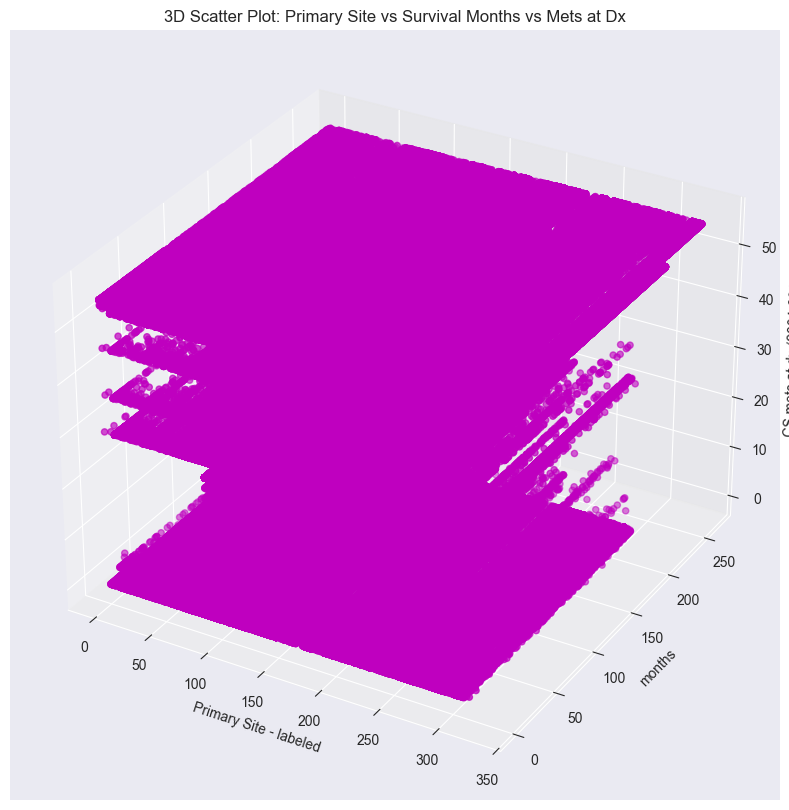

In [ ]:
##4.3.10 3D散点图 3D Scatter Plot: Primary Site vs Survival Months vs Mets at Dx
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[primary_site_col], data[target_col], data[mets_col], c='m', marker='o')
ax.set_xlabel(primary_site_col)
ax.set_ylabel(target_col)
ax.set_zlabel(mets_col)
ax.set_title("3D Scatter Plot: Primary Site vs Survival Months vs Mets at Dx")
plt.show()

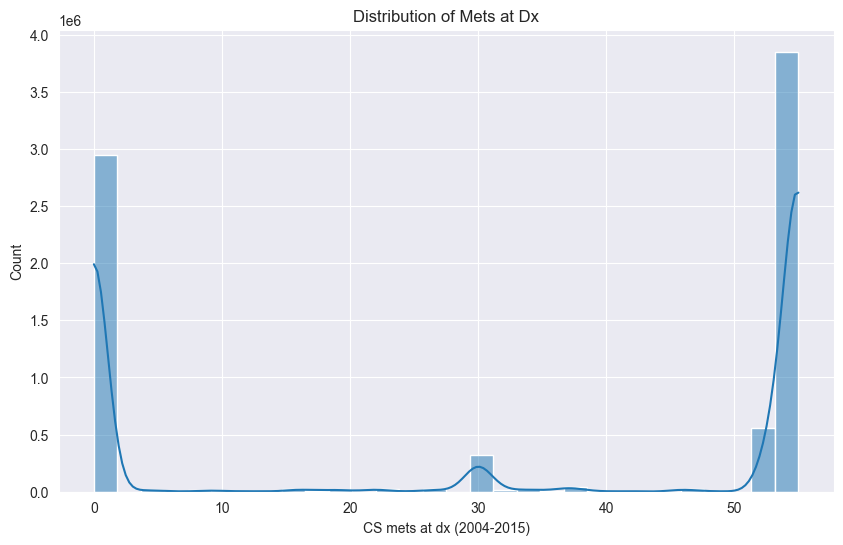

In [ ]:
#4.3.11 肿瘤扩散程度分布图  Distribution of Mets at Dx
plt.figure(figsize=(10, 6))
sns.histplot(data[mets_col], bins=30, kde=True)
plt.title("Distribution of Mets at Dx")
plt.show()